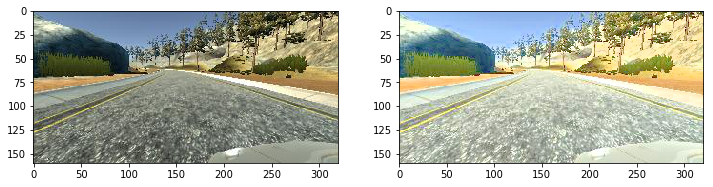

In [1]:
from os import listdir
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#
# Open an image
#
image_path = 'data/IMG/' + listdir('data/IMG')[0]
image = cv2.imread(image_path)

orig = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#
# convert to hsv.
#
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#
# grab the brightness channel
#
v = hsv[:, :, 2]

#
# get a random number between -100 and 99
# to represent the change in brightness
#
brightness_change = np.random.randint(-100, 100)

#
# Apply brightness change
#
if brightness_change > 0:
    lim = 255 - brightness_change
    v[v > lim] = 255
    v[v <= lim] += brightness_change
else:
    make_positive = brightness_change * -1.0
    v[v < make_positive] = 0
    v[v >= make_positive] + brightness_change

#
# put the altered channel back and convert
# back to BGR
#
hsv[:,:,2] = v

#
# Convert back to RGB for visualization
# 
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

#
# Visualize 
#
fig1, ax1 = plt.subplots(1, 2, figsize = (12, 4))
ax1[0].imshow(orig)
ax1[1].imshow(rgb)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

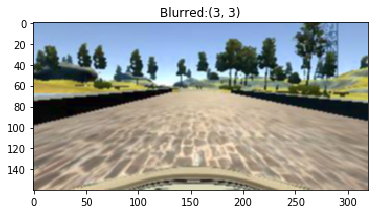

In [25]:
#
# Generate a random odd number for our
# kernel size between 3 and 9
#
kernel_size = (np.random.randint(1, 5) * 2) + 1

#
# Blur and return
#
blur = cv2.GaussianBlur(rgb, (kernel_size, kernel_size),  0)

plt.imshow(blur)
plt.title("Blurred:({}, {})".format(kernel_size, kernel_size))
plt.show